Consider a trader who wishes to invest in a basket of stocks selected from the 30 stocks available in the Dow Jones Industrial Average. She hopes to achieve a 25% Compounded annual growth rate over a period of 5 years on her portfolio. She has 1 Million USD at her disposal, and does not want her portfolio size to be more than 20 stocks. But before she invests she wants to analyze the risk she would be exposing herself to and the possibility of generating her target returns over the time frame in question. 
Let us perform a Monte Carlo test to check the same

I.           Download data for last 5 years for all the 30 stocks of the Dow Jones Industrial Average (ignore survivorship bias, and unless you have access to a point-in-time database, simply download the data for the current set of DJIA index constituents. 
II.         Calculate the following set of KPIs for each of the stocks over the period under study

- Average Monthly Return on a Positive Month 

- Average Monthly Return on a Negative Month 

- Probability of a Positive Month

In [70]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [71]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [72]:
# Could also do this for a Panel Object
data = data.DataReader(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM', 
                     'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK','MSFT','NKE','PFE','PG','TRV',
                     'UTX', 'UNH','VZ','V','WMT',],'google', start, end)

In [73]:
df = data['Close']

In [74]:
df.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-20,113.57,63.72,127.79,81.70,31.10,97.70,92.95,29.67,166.47,126.83,...,54.87,33.81,88.58,114.79,137.47,100.24,82.48,51.27,71.97,82.54
2016-09-21,113.55,64.28,130.56,83.47,31.36,99.63,92.39,29.85,167.03,128.11,...,55.34,34.28,87.80,115.93,139.91,101.96,83.22,51.87,72.19,83.30
2016-09-22,114.62,64.63,131.87,83.50,31.66,99.98,93.41,30.04,168.02,128.75,...,55.41,34.15,88.99,116.73,141.04,103.00,83.36,52.35,72.27,83.54
2016-09-23,112.71,63.85,131.78,82.44,31.34,99.22,93.27,29.89,165.13,127.79,...,55.15,34.26,87.76,115.31,140.51,102.56,82.54,52.56,72.35,83.45
2016-09-26,112.88,63.42,130.57,82.37,31.07,98.78,91.96,29.54,161.48,125.45,...,54.40,33.64,87.85,113.94,139.72,102.23,81.81,52.15,71.62,83.06


In [75]:
#resample daily close data to monthly data
data = df.resample('M').mean()
data.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-31,152.227727,77.779545,183.782273,101.990909,32.998636,105.704545,109.465455,28.297727,221.870455,155.854091,...,53.346818,32.805455,86.537273,121.393636,173.681364,120.975000,92.996364,45.768182,76.906364,82.082727
2017-06-30,147.831364,81.243636,194.482727,105.454545,31.721818,105.235455,105.772273,27.931818,220.564091,154.525455,...,53.220000,33.073182,88.665455,126.739091,182.693636,121.169091,95.030000,46.000455,77.554545,81.518636
2017-07-31,148.299500,84.959500,213.451000,109.325000,31.438500,104.662500,106.150500,26.323500,224.841000,150.410500,...,58.362500,33.320500,88.256500,126.162000,188.568500,122.007000,97.197000,44.408500,76.400500,80.576500
2017-08-31,159.021304,85.601304,237.667826,114.457391,31.503478,108.393478,103.536957,24.991739,225.036957,151.115652,...,56.823043,33.285217,91.926957,127.373913,194.228261,117.556087,102.229565,48.373913,79.976087,77.989130
2017-09-30,160.615455,85.933636,241.586364,119.479091,32.087273,112.366364,98.822727,24.277273,222.610000,157.431818,...,53.160909,34.657273,93.163636,119.630000,198.440000,111.549091,104.861818,47.088182,79.623636,79.013636


In [76]:
#calculate Monthly Returns
returns = np.log(data / data.shift(1))
returns.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-31,0.063325,-0.005748,0.024683,0.053984,-0.002431,-0.012417,-0.039407,-0.049251,-0.011576,0.043491,...,-0.039075,-0.033767,-0.032704,0.004706,0.028539,0.057075,0.032488,-0.051661,0.042822,0.002717
2017-06-30,-0.029305,0.043574,0.056592,0.033396,-0.039462,-0.004448,-0.034321,-0.013015,-0.005905,-0.008561,...,-0.002380,0.008128,0.024295,0.043092,0.050588,0.001603,0.021632,0.005062,0.008393,-0.006896
2017-07-31,0.003162,0.044722,0.093064,0.036045,-0.008971,-0.005459,0.003569,-0.059304,0.019205,-0.026991,...,0.092239,0.007450,-0.004623,-0.004564,0.031651,0.006891,0.022547,-0.035220,-0.014992,-0.011625
2017-08-31,0.069804,0.007526,0.107467,0.045878,0.002065,0.035027,-0.024929,-0.051917,0.000871,0.004677,...,-0.026732,-0.001059,0.040747,0.009560,0.029573,-0.037163,0.050481,0.085530,0.045738,-0.032638
2017-09-30,0.009975,0.003875,0.016353,0.042939,0.018362,0.035997,-0.046601,-0.029005,-0.010843,0.040947,...,-0.066619,0.040394,0.013363,-0.062723,0.021453,-0.052451,0.025423,-0.026939,-0.004417,0.013051


In [84]:
returns.describe()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
count,2.000000,3.000000,0.0,1.0000,7.000000,7.000000,5.000000,10.000000,5.000000,3.000000,...,7.000000,5.000000,6.000000,6.000000,1.00000,3.000000,3.000000,8.000000,4.000000,8.000000
mean,-0.039243,-0.007493,NaN,-0.0284,-0.017140,-0.015262,-0.029304,-0.029072,-0.022931,-0.016051,...,-0.032308,-0.023642,-0.017293,-0.023337,-0.00193,-0.034671,-0.018255,-0.035358,-0.024659,-0.019400
std,0.014054,0.002852,NaN,NaN,0.013898,0.011225,0.017549,0.019445,0.028175,0.009687,...,0.020804,0.017175,0.015427,0.020451,NaN,0.019147,0.015060,0.018305,0.017842,0.017979
min,-0.049180,-0.010784,NaN,-0.0284,-0.039462,-0.034091,-0.046601,-0.059304,-0.073094,-0.026991,...,-0.066619,-0.040902,-0.038908,-0.062723,-0.00193,-0.052451,-0.029855,-0.060533,-0.041107,-0.049842
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,-0.029305,-0.005748,NaN,-0.0284,-0.002431,-0.004448,-0.001262,-0.002330,-0.005905,-0.008561,...,-0.002380,-0.001059,-0.000147,-0.004564,-0.00193,-0.014401,-0.001235,-0.002352,-0.004417,-0.001931


In [77]:
#replace all Neg values with NaN, for Perf Calculations
returns[returns < 0] = np.nan

In [78]:
returns.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-31,0.063325,NaN,0.024683,0.053984,NaN,NaN,NaN,NaN,NaN,0.043491,...,NaN,NaN,NaN,0.004706,0.028539,0.057075,0.032488,NaN,0.042822,0.002717
2017-06-30,NaN,0.043574,0.056592,0.033396,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.008128,0.024295,0.043092,0.050588,0.001603,0.021632,0.005062,0.008393,NaN
2017-07-31,0.003162,0.044722,0.093064,0.036045,NaN,NaN,0.003569,NaN,0.019205,NaN,...,0.092239,0.007450,NaN,NaN,0.031651,0.006891,0.022547,NaN,NaN,NaN
2017-08-31,0.069804,0.007526,0.107467,0.045878,0.002065,0.035027,NaN,NaN,0.000871,0.004677,...,NaN,NaN,0.040747,0.009560,0.029573,NaN,0.050481,0.085530,0.045738,NaN
2017-09-30,0.009975,0.003875,0.016353,0.042939,0.018362,0.035997,NaN,NaN,NaN,0.040947,...,NaN,0.040394,0.013363,NaN,0.021453,NaN,0.025423,NaN,NaN,0.013051


In [79]:
returns.describe()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
count,10.000000,9.000000,12.000000,11.000000,5.000000,5.000000,7.000000,2.000000,7.000000,9.000000,...,5.000000,7.000000,6.000000,6.000000,11.000000,9.000000,9.000000,4.000000,8.000000,4.000000
mean,0.042756,0.035278,0.051010,0.034229,0.028312,0.044546,0.030367,0.043398,0.060157,0.028671,...,0.041044,0.020020,0.025794,0.029989,0.032021,0.021579,0.032636,0.045457,0.025032,0.022257
std,0.033064,0.029884,0.030517,0.014932,0.029802,0.021673,0.022970,0.003960,0.072198,0.019114,...,0.031102,0.015186,0.013773,0.031111,0.024379,0.021100,0.014931,0.041708,0.017633,0.018990
min,0.003162,0.002750,0.001159,0.002457,0.002065,0.018701,0.003569,0.040598,0.000871,0.004677,...,0.014325,0.001849,0.013363,0.004706,0.003260,0.001603,0.009528,0.005062,0.003043,0.002717
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.111799,0.095869,0.107467,0.053984,0.071991,0.072948,0.069011,0.046198,0.172169,0.055948,...,0.092239,0.040394,0.044888,0.087454,0.082644,0.057075,0.053426,0.085530,0.047354,0.046684


In [81]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
# Could also do this for a Panel Object
data = data.DataReader(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM', 
                     'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK','MSFT','NKE','PFE','PG','TRV',
                     'UTX', 'UNH','VZ','V','WMT',],'google', start, end)
df = data['Close']
data = df.resample('M').mean()
returns = np.log(data / data.shift(1))
returns.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-31,0.063325,-0.005748,0.024683,0.053984,-0.002431,-0.012417,-0.039407,-0.049251,-0.011576,0.043491,...,-0.039075,-0.033767,-0.032704,0.004706,0.028539,0.057075,0.032488,-0.051661,0.042822,0.002717
2017-06-30,-0.029305,0.043574,0.056592,0.033396,-0.039462,-0.004448,-0.034321,-0.013015,-0.005905,-0.008561,...,-0.002380,0.008128,0.024295,0.043092,0.050588,0.001603,0.021632,0.005062,0.008393,-0.006896
2017-07-31,0.003162,0.044722,0.093064,0.036045,-0.008971,-0.005459,0.003569,-0.059304,0.019205,-0.026991,...,0.092239,0.007450,-0.004623,-0.004564,0.031651,0.006891,0.022547,-0.035220,-0.014992,-0.011625
2017-08-31,0.069804,0.007526,0.107467,0.045878,0.002065,0.035027,-0.024929,-0.051917,0.000871,0.004677,...,-0.026732,-0.001059,0.040747,0.009560,0.029573,-0.037163,0.050481,0.085530,0.045738,-0.032638
2017-09-30,0.009975,0.003875,0.016353,0.042939,0.018362,0.035997,-0.046601,-0.029005,-0.010843,0.040947,...,-0.066619,0.040394,0.013363,-0.062723,0.021453,-0.052451,0.025423,-0.026939,-0.004417,0.013051


In [83]:
#replace all Pos values with NaN, for Perf Calculations
returns[returns > 0] = np.nan
returns.describe()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
count,2.000000,3.000000,0.0,1.0000,7.000000,7.000000,5.000000,10.000000,5.000000,3.000000,...,7.000000,5.000000,6.000000,6.000000,1.00000,3.000000,3.000000,8.000000,4.000000,8.000000
mean,-0.039243,-0.007493,NaN,-0.0284,-0.017140,-0.015262,-0.029304,-0.029072,-0.022931,-0.016051,...,-0.032308,-0.023642,-0.017293,-0.023337,-0.00193,-0.034671,-0.018255,-0.035358,-0.024659,-0.019400
std,0.014054,0.002852,NaN,NaN,0.013898,0.011225,0.017549,0.019445,0.028175,0.009687,...,0.020804,0.017175,0.015427,0.020451,NaN,0.019147,0.015060,0.018305,0.017842,0.017979
min,-0.049180,-0.010784,NaN,-0.0284,-0.039462,-0.034091,-0.046601,-0.059304,-0.073094,-0.026991,...,-0.066619,-0.040902,-0.038908,-0.062723,-0.00193,-0.052451,-0.029855,-0.060533,-0.041107,-0.049842
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,-0.029305,-0.005748,NaN,-0.0284,-0.002431,-0.004448,-0.001262,-0.002330,-0.005905,-0.008561,...,-0.002380,-0.001059,-0.000147,-0.004564,-0.00193,-0.014401,-0.001235,-0.002352,-0.004417,-0.001931


Probability of a Positive Month

In [138]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 1)
# Could also do this for a Panel Object
data = data.DataReader(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'XOM', 
                     'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK','MSFT','NKE','PFE','PG','TRV',
                     'UTX', 'UNH','VZ','V','WMT',],'google', start, end)
df = data['Close']
data = df.resample('M').mean()
returns = (data - data.shift(1)) / data.shift(1)
returns = returns.dropna()
returns

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-31,0.021346,-0.005930,0.041424,0.028145,-0.022044,0.018877,-0.001261,-0.024773,0.046292,-0.012521,...,-0.046366,-0.032073,-0.012083,-0.023761,-0.001928,-0.014297,-0.001234,-0.047975,-0.037404,0.026931
2016-11-30,-0.047991,0.100615,0.072982,0.044918,-0.005722,0.061897,0.045640,0.041433,0.167006,0.005248,...,-0.020761,-0.040077,-0.038161,-0.018718,0.060214,0.054951,-0.023396,-0.027393,0.015385,-0.011667
2016-12-31,0.037960,0.058498,0.061205,0.043119,-0.010542,0.075675,0.071448,0.047282,0.187879,0.057542,...,0.014428,0.022523,-0.000147,0.091392,0.086155,0.033093,-0.029414,0.080141,0.003048,0.047791
2017-01-31,0.045780,0.032502,0.034388,0.002460,0.004224,-0.006125,0.045672,-0.024249,0.002960,0.016200,...,0.033481,0.001851,0.016639,-0.018239,0.003265,0.011036,0.048618,-0.002349,-0.040273,-0.036588
2017-02-28,0.118288,0.030816,0.057306,0.013965,0.074645,-0.033516,0.016274,-0.030142,0.026548,0.036419,...,0.046868,0.022085,0.045910,0.017370,0.004361,0.005233,0.054879,-0.058737,0.019145,-0.048620
2017-03-31,0.051634,0.002754,0.054257,-0.028000,0.045954,-0.023024,0.016545,-0.005643,-0.013148,0.044286,...,0.020121,0.038939,0.015081,0.018065,0.034934,0.009538,0.031200,0.014247,0.018848,-0.003251
2017-04-30,0.016136,-0.010726,0.001160,0.034623,-0.030029,-0.020765,0.018310,-0.002327,-0.070486,0.012650,...,-0.022636,-0.009835,-0.015106,-0.011319,0.007387,0.017049,0.009574,-0.028800,0.048493,-0.001930
2017-05-31,0.065373,-0.005731,0.024990,0.055467,-0.002428,-0.012340,-0.038640,-0.048058,-0.011509,0.044451,...,-0.038322,-0.033203,-0.032175,0.004717,0.028950,0.058735,0.033021,-0.050349,0.043752,0.002721
2017-06-30,-0.028880,0.044537,0.058224,0.033960,-0.038693,-0.004438,-0.033738,-0.012931,-0.005888,-0.008525,...,-0.002377,0.008161,0.024593,0.044034,0.051890,0.001604,0.021868,0.005075,0.008428,-0.006872


In [126]:
#Calculate individual mean returns and covariance between the stocks

meanDailyReturns = returns.mean()
covMatrix = returns.cov()

In [127]:
data.iloc[0]

AAPL    113.288889
AXP      63.978889
BA      130.987778
CAT      84.354444
CSCO     31.402222
CVX     100.070000
DIS      92.506667
GE       29.768889
GS      163.854444
HD      127.625556
IBM     156.341111
INTC     37.296667
JNJ     118.546667
JPM      66.558889
KO       42.412222
MCD     116.294444
MMM     177.318889
MRK      62.551111
MSFT     57.522222
NKE      54.285556
PFE      33.905556
PG       88.531111
TRV     114.948889
UNH     139.796667
UTX     101.927778
V        82.573333
VZ       52.094444
WMT      71.930000
XOM      84.418889
Name: 2016-09-30 00:00:00, dtype: float64

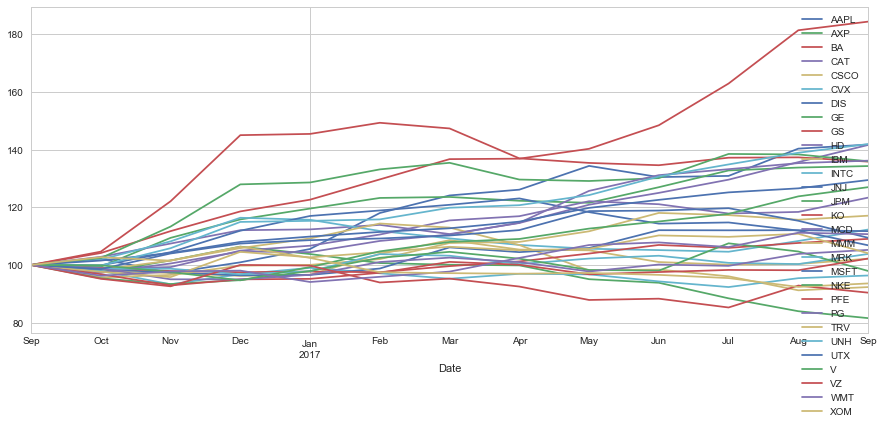

In [128]:
(data / data.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [129]:

returns.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GE,GS,HD,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,0.021346,-0.005930,0.041424,0.028145,-0.022044,0.018877,-0.001261,-0.024773,0.046292,-0.012521,...,-0.046366,-0.032073,-0.012083,-0.023761,-0.001928,-0.014297,-0.001234,-0.047975,-0.037404,0.026931
2016-11-30,-0.047991,0.100615,0.072982,0.044918,-0.005722,0.061897,0.045640,0.041433,0.167006,0.005248,...,-0.020761,-0.040077,-0.038161,-0.018718,0.060214,0.054951,-0.023396,-0.027393,0.015385,-0.011667
2016-12-31,0.037960,0.058498,0.061205,0.043119,-0.010542,0.075675,0.071448,0.047282,0.187879,0.057542,...,0.014428,0.022523,-0.000147,0.091392,0.086155,0.033093,-0.029414,0.080141,0.003048,0.047791
2017-01-31,0.045780,0.032502,0.034388,0.002460,0.004224,-0.006125,0.045672,-0.024249,0.002960,0.016200,...,0.033481,0.001851,0.016639,-0.018239,0.003265,0.011036,0.048618,-0.002349,-0.040273,-0.036588


In [130]:
weights = np.array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
                    0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,])

In [131]:
annual_returns = returns.mean() * 250
annual_returns

AAPL     7.606978
AXP      6.343907
BA      13.196003
CAT      7.420416
CSCO     0.563153
CVX      2.564510
DIS      1.534836
GE      -4.086833
GS       7.065217
HD       4.491802
IBM     -1.455296
INTC    -0.692811
JNJ      2.415771
JPM      6.761231
KO       1.836069
MCD      6.619626
MMM      3.403017
MRK      0.857419
MSFT     5.447543
NKE     -0.203366
PFE      0.541903
PG       1.145420
TRV      0.995782
UNH      7.480925
UTX      2.005794
V        5.113416
VZ      -1.834009
WMT      2.227809
XOM     -1.292019
dtype: float64

In [140]:
#we are only going to choose five random companies from the list.
companies = list(returns.sample(5,axis=1, random_state=4).columns)
companies

['INTC', 'PG', 'WMT', 'MCD', 'PFE']

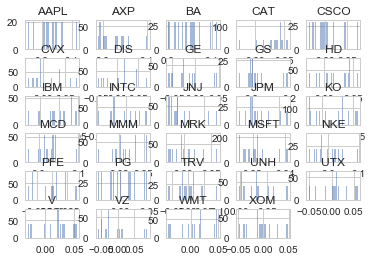

In [143]:
mean = returns.mean()
sigma = returns.std()
tdf, tmean, tsigma = scipy.stats.t.fit(returns.as_matrix())
returns.hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5);

In [144]:
returns.quantile(0.05)

AAPL   -0.037480
AXP    -0.008088
BA      0.009590
CAT    -0.011247
CSCO   -0.033928
CVX    -0.027746
DIS    -0.041742
GE     -0.053737
GS     -0.038950
HD     -0.018870
IBM    -0.066544
INTC   -0.035145
JNJ    -0.015265
JPM    -0.028709
KO     -0.010496
MCD    -0.013412
MMM    -0.026912
MRK    -0.025835
MSFT    0.011282
NKE    -0.054503
PFE    -0.036296
PG     -0.034869
TRV    -0.040427
UNH     0.000928
UTX    -0.043059
V      -0.026104
VZ     -0.054124
WMT    -0.038695
XOM    -0.042002
dtype: float64

In [146]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 1)
# Could also do this for a Panel Object
data = data.DataReader('AAPL', "google", start, end)
df = data['Close']

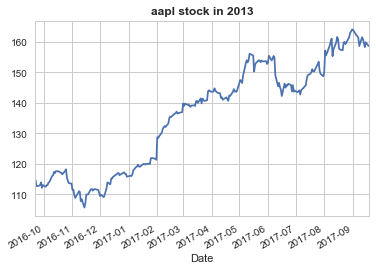

In [149]:
df.plot(y="Close")
plt.title(u"aapl stock in 2013", weight='bold');

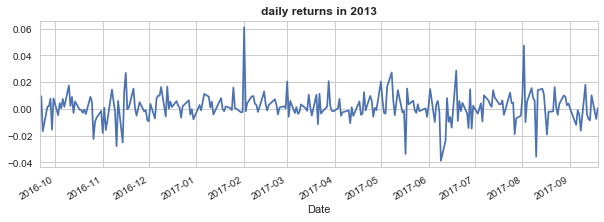

In [152]:
fig = plt.figure()
fig.set_size_inches(10,3)
df.pct_change().plot()
plt.title(u"daily returns in 2013", weight='bold');

0.010778265054129226

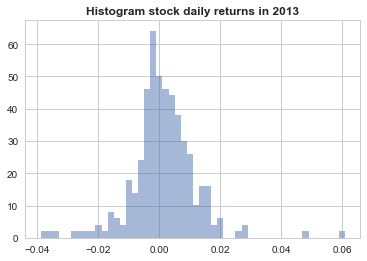

In [153]:
df.pct_change().hist(bins=50, normed=True, histtype='stepfilled', alpha=0.5)
plt.title(u"Histogram stock daily returns in 2013", weight='bold')
df.pct_change().std()

In [154]:
days = 300   # time horizon
dt = 1/float(days)
sigma = 0.04 # volatility
mu = 0.05  # drift (average growth rate)

In [155]:
def random_walk(startprice):
    price = numpy.zeros(days)
    shock = numpy.zeros(days)
    price[0] = startprice
    for i in range(1, days):
        shock[i] = numpy.random.normal(loc=mu * dt, scale=sigma * numpy.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

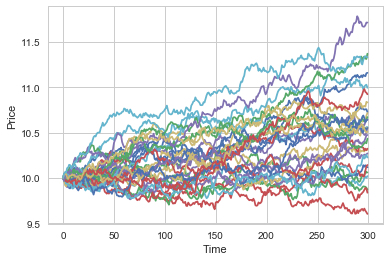

In [156]:
for run in range(30):
    plt.plot(random_walk(10.0))
plt.xlabel("Time")
plt.ylabel("Price");

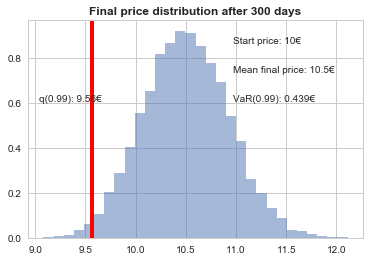

In [157]:
runs = 10000
simulations = numpy.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(10.0)[days-1]
q = numpy.percentile(simulations, 1)
plt.hist(simulations, normed=True, bins=30, histtype='stepfilled', alpha=0.5)
plt.figtext(0.6, 0.8, u"Start price: 10€")
plt.figtext(0.6, 0.7, u"Mean final price: {:.3}€".format(simulations.mean()))
plt.figtext(0.6, 0.6, u"VaR(0.99): {:.3}€".format(10 - q))
plt.figtext(0.15, 0.6, u"q(0.99): {:.3}€".format(q))
plt.axvline(x=q, linewidth=4, color='r')
plt.title(u"Final price distribution after {} days".format(days), weight='bold');